<a href="https://colab.research.google.com/github/Rakshithbodakuntla/HuggingFace_transformers_and_GAN/blob/main/Digit_Class_Controlled_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
latent_dim = 100
num_classes = 10
img_shape = (1, 28, 28)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label embedding size
embedding_dim = 50


In [2]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.label_embed = nn.Embedding(num_classes, embedding_dim)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + embedding_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, z, labels):
        label_embedding = self.label_embed(labels)
        x = torch.cat((z, label_embedding), dim=1)
        img = self.model(x)
        return img.view(-1, *img_shape)


In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.label_embed = nn.Embedding(num_classes, embedding_dim)
        self.model = nn.Sequential(
            nn.Linear(784 + embedding_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embedding = self.label_embed(labels)
        img_flat = img.view(img.size(0), -1)
        x = torch.cat((img_flat, label_embedding), dim=1)
        return self.model(x)


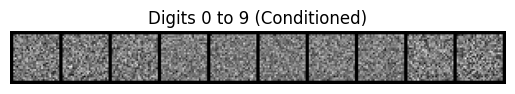

In [7]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

def generate_digit_row():
    z = torch.randn(10, latent_dim).to(device)
    labels = torch.arange(0, 10).to(device)
    with torch.no_grad():
        gen_imgs = generator(z, labels).cpu()
    grid = torchvision.utils.make_grid(gen_imgs, nrow=10, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Digits 0 to 9 (Conditioned)")
    plt.show()

generate_digit_row()